Statistics about suicide are not easy to collate, and may be inaccurate due to the sensitivity of the issue. However,taking into account the existing data I am going to present the analysis on world suicide data from 1985 to 2016. The following features are present in the data:
*     country-name of the countries
*     year-year for the suicides recorded
*     sex-gender
*     age-age groups
*     suicides_no-number of suicides for the mentioned age groupes
*     population-number of individuals in the corresponding age groups
*     suicides/100k pop-number of suicides per 100k population
*     country-year-column combining data in columns "country" and "year"
*     HDI for year-The Human Development Index for given year (a statistic composite index of life expectancy, education, and per capita income indicators)
*     gdp_for_year - GDP (a monetary measure of all market values of all the goods and services produced in certain period of time)
*     gdp_per_capita - GDP per person (obtained by dividing its GDP for a particular period by its average population for the year)
*     generation-generation for each group

In this kernel we'll see how each of the features is related to the number of suicides worldwide, and which are the countries with high suicide rate.

Let's see what our data looks like.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("../input/master.csv")
file = data.copy()
file.drop('country-year', axis = 1, inplace = True)
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


Below we can see the summary of descriptive statistics, data features and their types:

In [2]:
file.describe(include = "all")

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,NaN,2321,NaN,6
top,Netherlands,NaN,male,15-24 years,NaN,NaN,NaN,NaN,"190,379,720,927",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,0.855000,NaN,24874.000000,NaN


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


After making changes in feature names and the dtypes, we gat the following:

In [4]:
file[" gdp_for_year ($) "] = file[" gdp_for_year ($) "].str.replace(',' , '')
file['GDP for year'] = file[' gdp_for_year ($) '].astype("int64")
file['GDP per capita'] = file['gdp_per_capita ($)'].astype("int64")

file.drop([' gdp_for_year ($) ', 'gdp_per_capita ($)'], axis = 1, inplace = True)
file[["country", "sex", "generation", "age"]] = file[["country", "sex", "generation", "age"]].apply(lambda x: x.astype('category'))
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country              27820 non-null category
year                 27820 non-null int64
sex                  27820 non-null category
age                  27820 non-null category
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
HDI for year         8364 non-null float64
generation           27820 non-null category
GDP for year         27820 non-null int64
GDP per capita       27820 non-null int64
dtypes: category(4), float64(2), int64(5)
memory usage: 1.6 MB


In [5]:
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,generation,GDP for year,GDP per capita
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,Generation X,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,Silent,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,Generation X,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,G.I. Generation,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,Boomers,2156624900,796


Next we can see the distribution of suicides in each generation. The distribution is presented for the total number of suicides and number of suicides per 100k population.

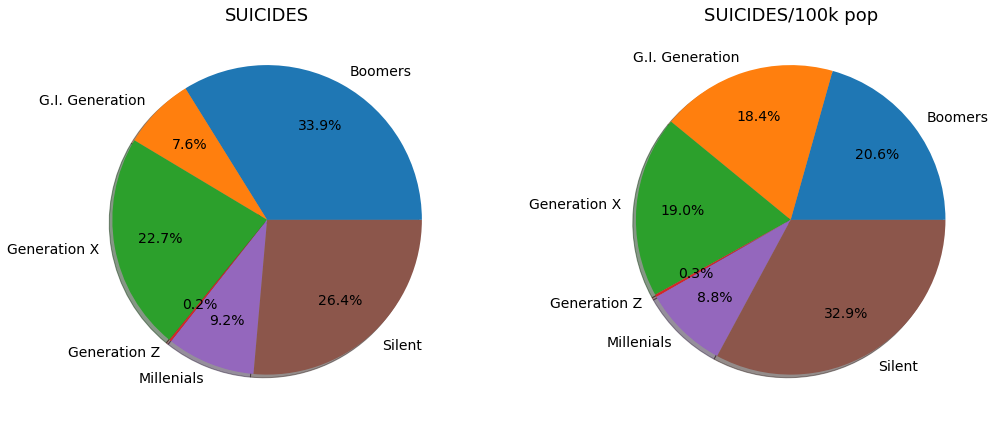

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

grouped_gen1=file.groupby("generation")['suicides_no'].sum()
x1=grouped_gen1.index.tolist()
y1=grouped_gen1.values.tolist()
ax1.pie(y1,labels=x1, autopct='%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize': 14})
ax1.set_title("SUICIDES", fontsize=18, color='k')
grouped_gen2=file.groupby("generation")['suicides/100k pop'].sum()
x2=grouped_gen2.index.tolist()
y2=grouped_gen2.values.tolist()
ax2.pie(y2,labels=x2, autopct='%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize': 14})
ax2.set_title("SUICIDES/100k pop", fontsize=18, color='k')
plt.tight_layout()
plt.draw()

One can notice that about one third of the number of all suicides was done the Boomers' generation.

Below we can see rough distribution of each feature in our data.

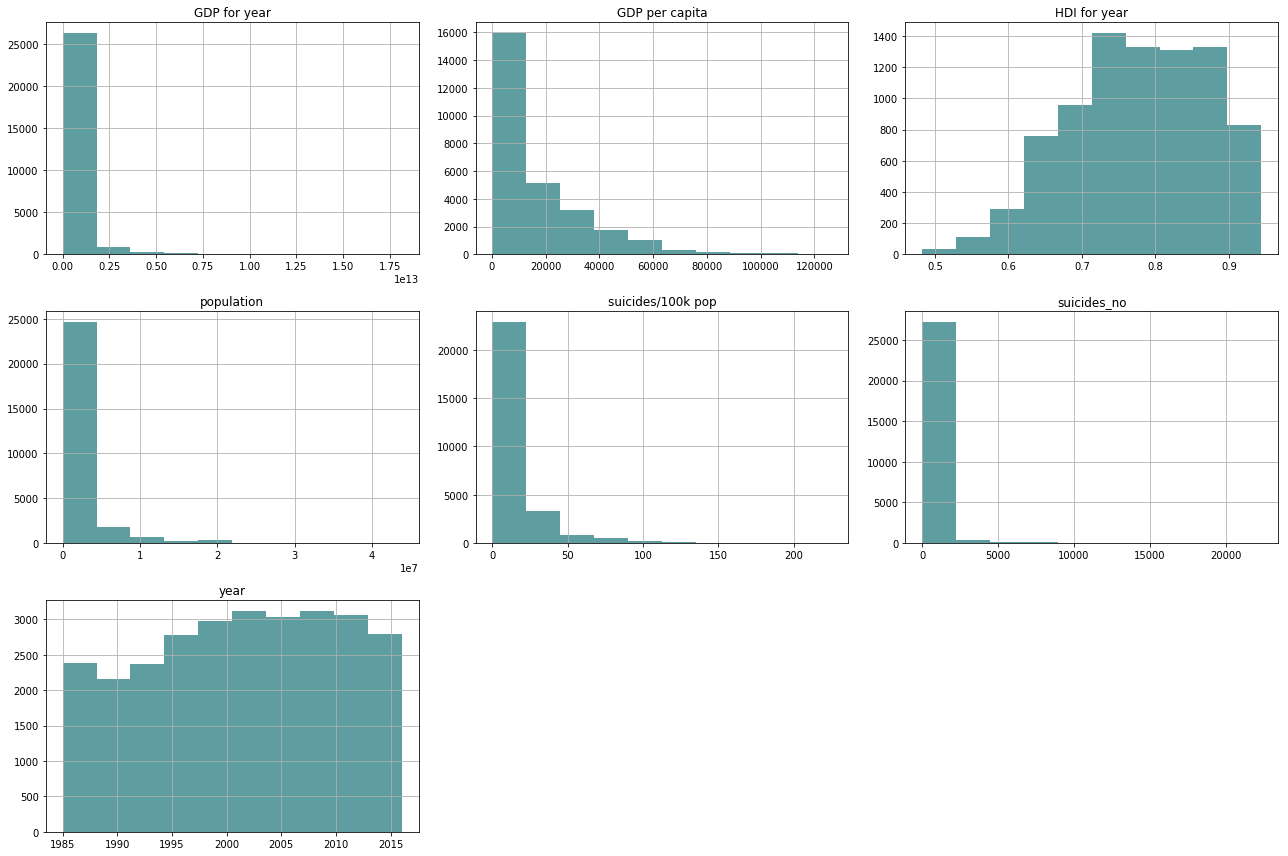

In [7]:
file.hist(bins=10, color="cadetblue")
plt.tight_layout(rect=(0, 0, 3, 3)) 

One can notice that most of the features are right skewed. So we'll make log-transformation on those features. Below we can see the comparison of the data distributions before and after log-transformation.

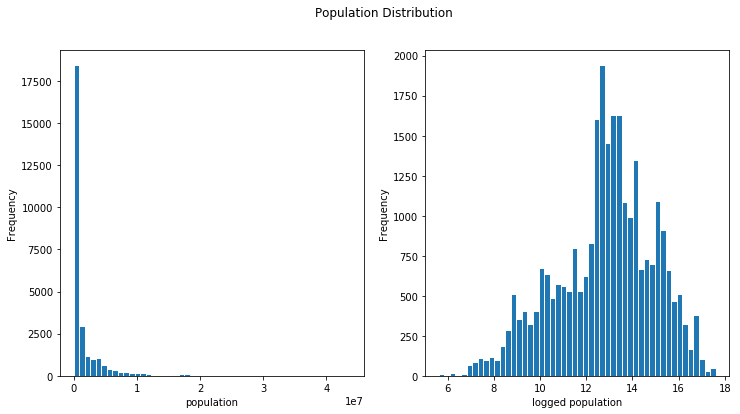

In [8]:
ax1=plt.subplot(1,2,1)
file['population'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("population")

ax2=plt.subplot(1,2,2)
np.log(file["population"]).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("logged population")
plt.suptitle("Population Distribution")
plt.show()

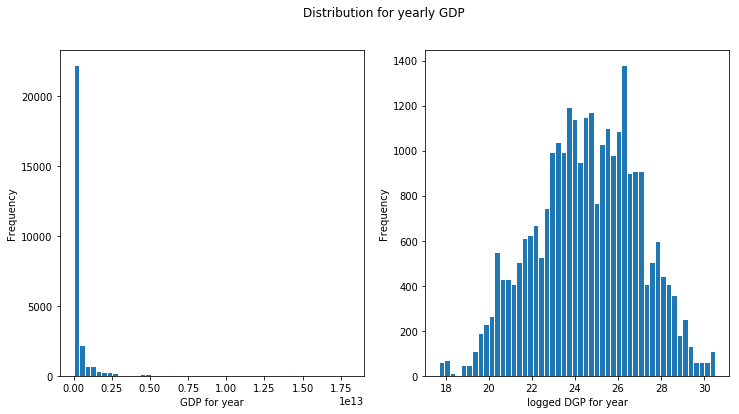

In [9]:
ax1=plt.subplot(1,2,1)
file['GDP for year'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("GDP for year")

ax2=plt.subplot(1,2,2)
np.log(file["GDP for year"]).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("logged DGP for year")
plt.suptitle("Distribution for yearly GDP")
plt.show()

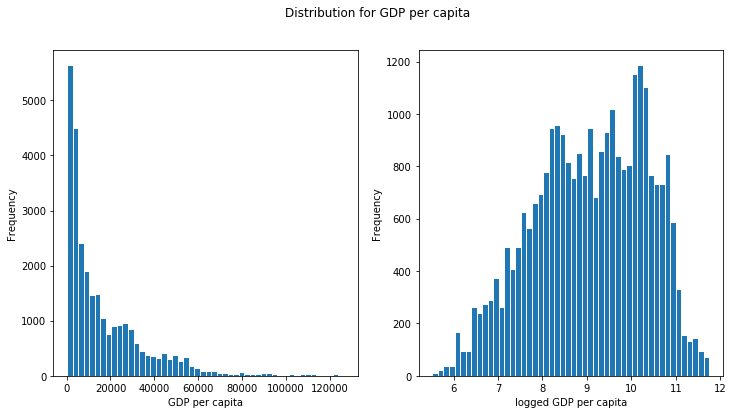

In [10]:
ax1=plt.subplot(1,2,1)
file['GDP per capita'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("GDP per capita")

ax2=plt.subplot(1,2,2)
np.log(file["GDP per capita"]).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("logged GDP per capita")
plt.suptitle("Distribution for GDP per capita")
plt.show()

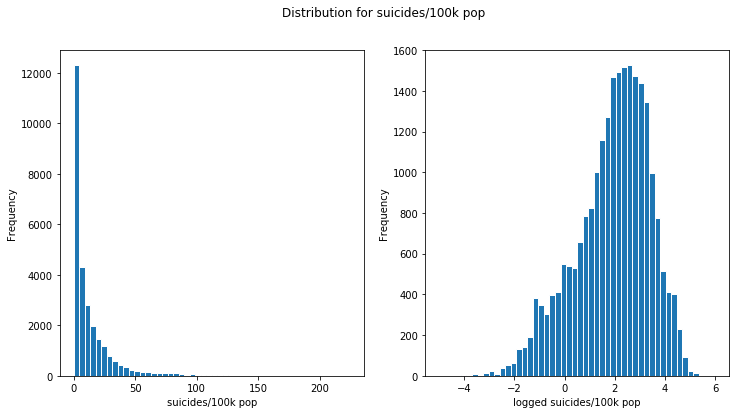

In [11]:
ax1=plt.subplot(1,2,1)
file['suicides/100k pop'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("suicides/100k pop")

ax2=plt.subplot(1,2,2)
np.log(file["suicides/100k pop"]).plot.hist(bins=50, edgecolor="white", figsize=(12,6), range=[-5, 6])
ax2.set_xlabel("logged suicides/100k pop")
plt.suptitle("Distribution for suicides/100k pop")
plt.show()


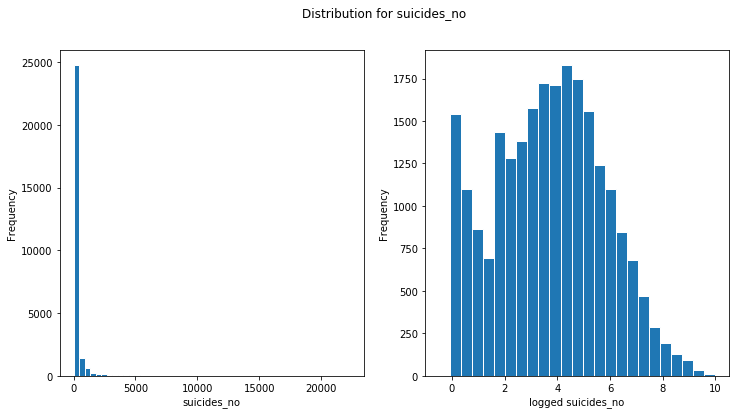

In [12]:
ax1=plt.subplot(1,2,1)
file['suicides_no'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("suicides_no")

ax2=plt.subplot(1,2,2)
np.log(file["suicides_no"]).plot.hist(bins=25, edgecolor="white", figsize=(12,6), range=[-0.5, 10])
ax2.set_xlabel("logged suicides_no")
plt.suptitle("Distribution for suicides_no")
plt.show()

In the data provided, the number of suicides between the genders and the age groups is as follows:

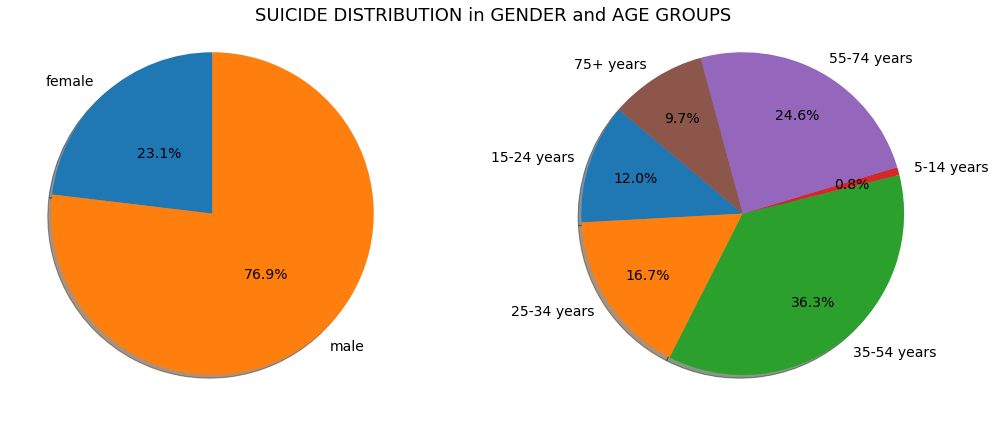

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
grouped_sex = file.groupby("sex")['suicides_no'].sum()
x = grouped_sex.index.tolist()
y = grouped_sex.values.tolist()
ax1.pie(y,labels=x, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.5, textprops={'fontsize': 14})
grouped_age = file.groupby("age")['suicides_no'].sum()
x = grouped_age.index.tolist()
y = grouped_age.values.tolist()
ax2.pie(y,labels=x, autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.7, textprops={'fontsize': 14})
f.suptitle("SUICIDE DISTRIBUTION in GENDER and AGE GROUPS", fontsize=18, color = 'k')
f.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

In the figure below we see the recorded number of years taken from the table.

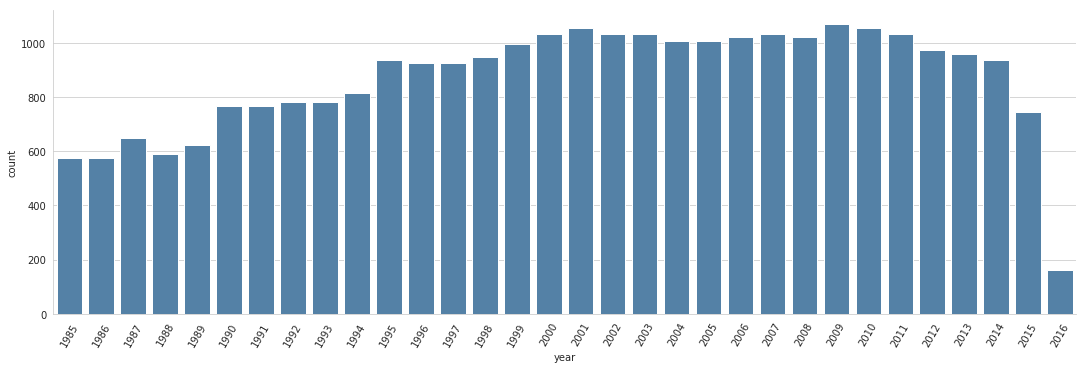

In [14]:
sns.set_style("whitegrid")
g=sns.factorplot("year", data=file, aspect=3, kind='count', color="steelblue")
g.set_xticklabels(rotation=60)  
plt.draw()

As it contains years with zero records of suicides, we'd better remove zero recordings from the data, and see if the distribution will change significantly.

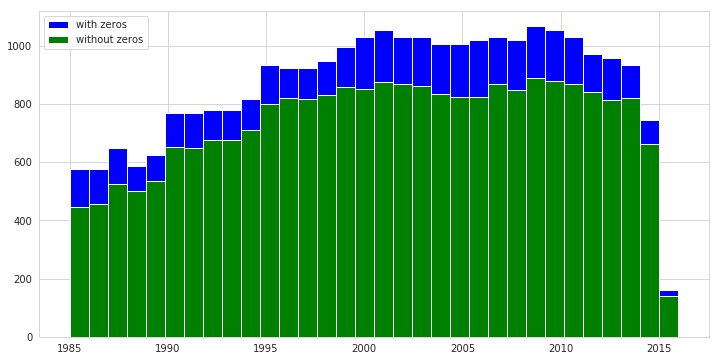

In [15]:
fig=plt.figure(figsize=(12,6))
file_no_zero=file.copy()
file_no_zero["year_no_zero"]=file_no_zero.loc[(file_no_zero["suicides_no"]!=0), "year"]
plt.hist(file_no_zero["year"], color='blue', bins=32)
plt.hist(file_no_zero["year_no_zero"], color='green', bins=32)
plt.legend(labels=["with zeros","without zeros"], loc="upper left")
plt.draw()

Now let's check the relationship of all numerical features in the file.

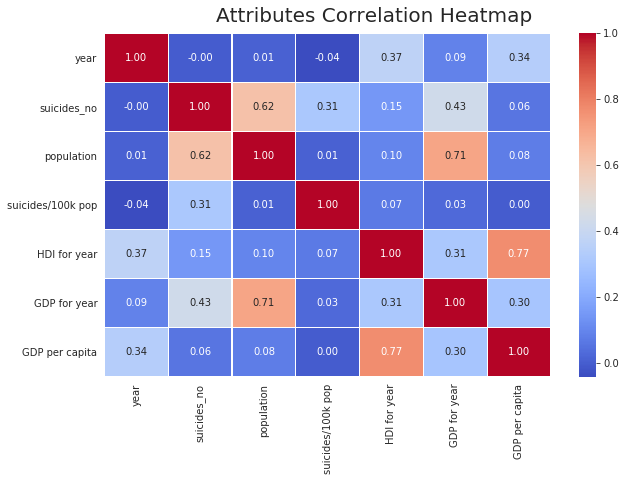

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
corr = file.corr()
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = "coolwarm",fmt = '.2f',
                 linewidths = .05)
fig.subplots_adjust(top = 0.92)
fig.suptitle('Attributes Correlation Heatmap', fontsize = 20)
plt.show()

Now let's see the total number of suicides in the listed countries for 1985-2016.

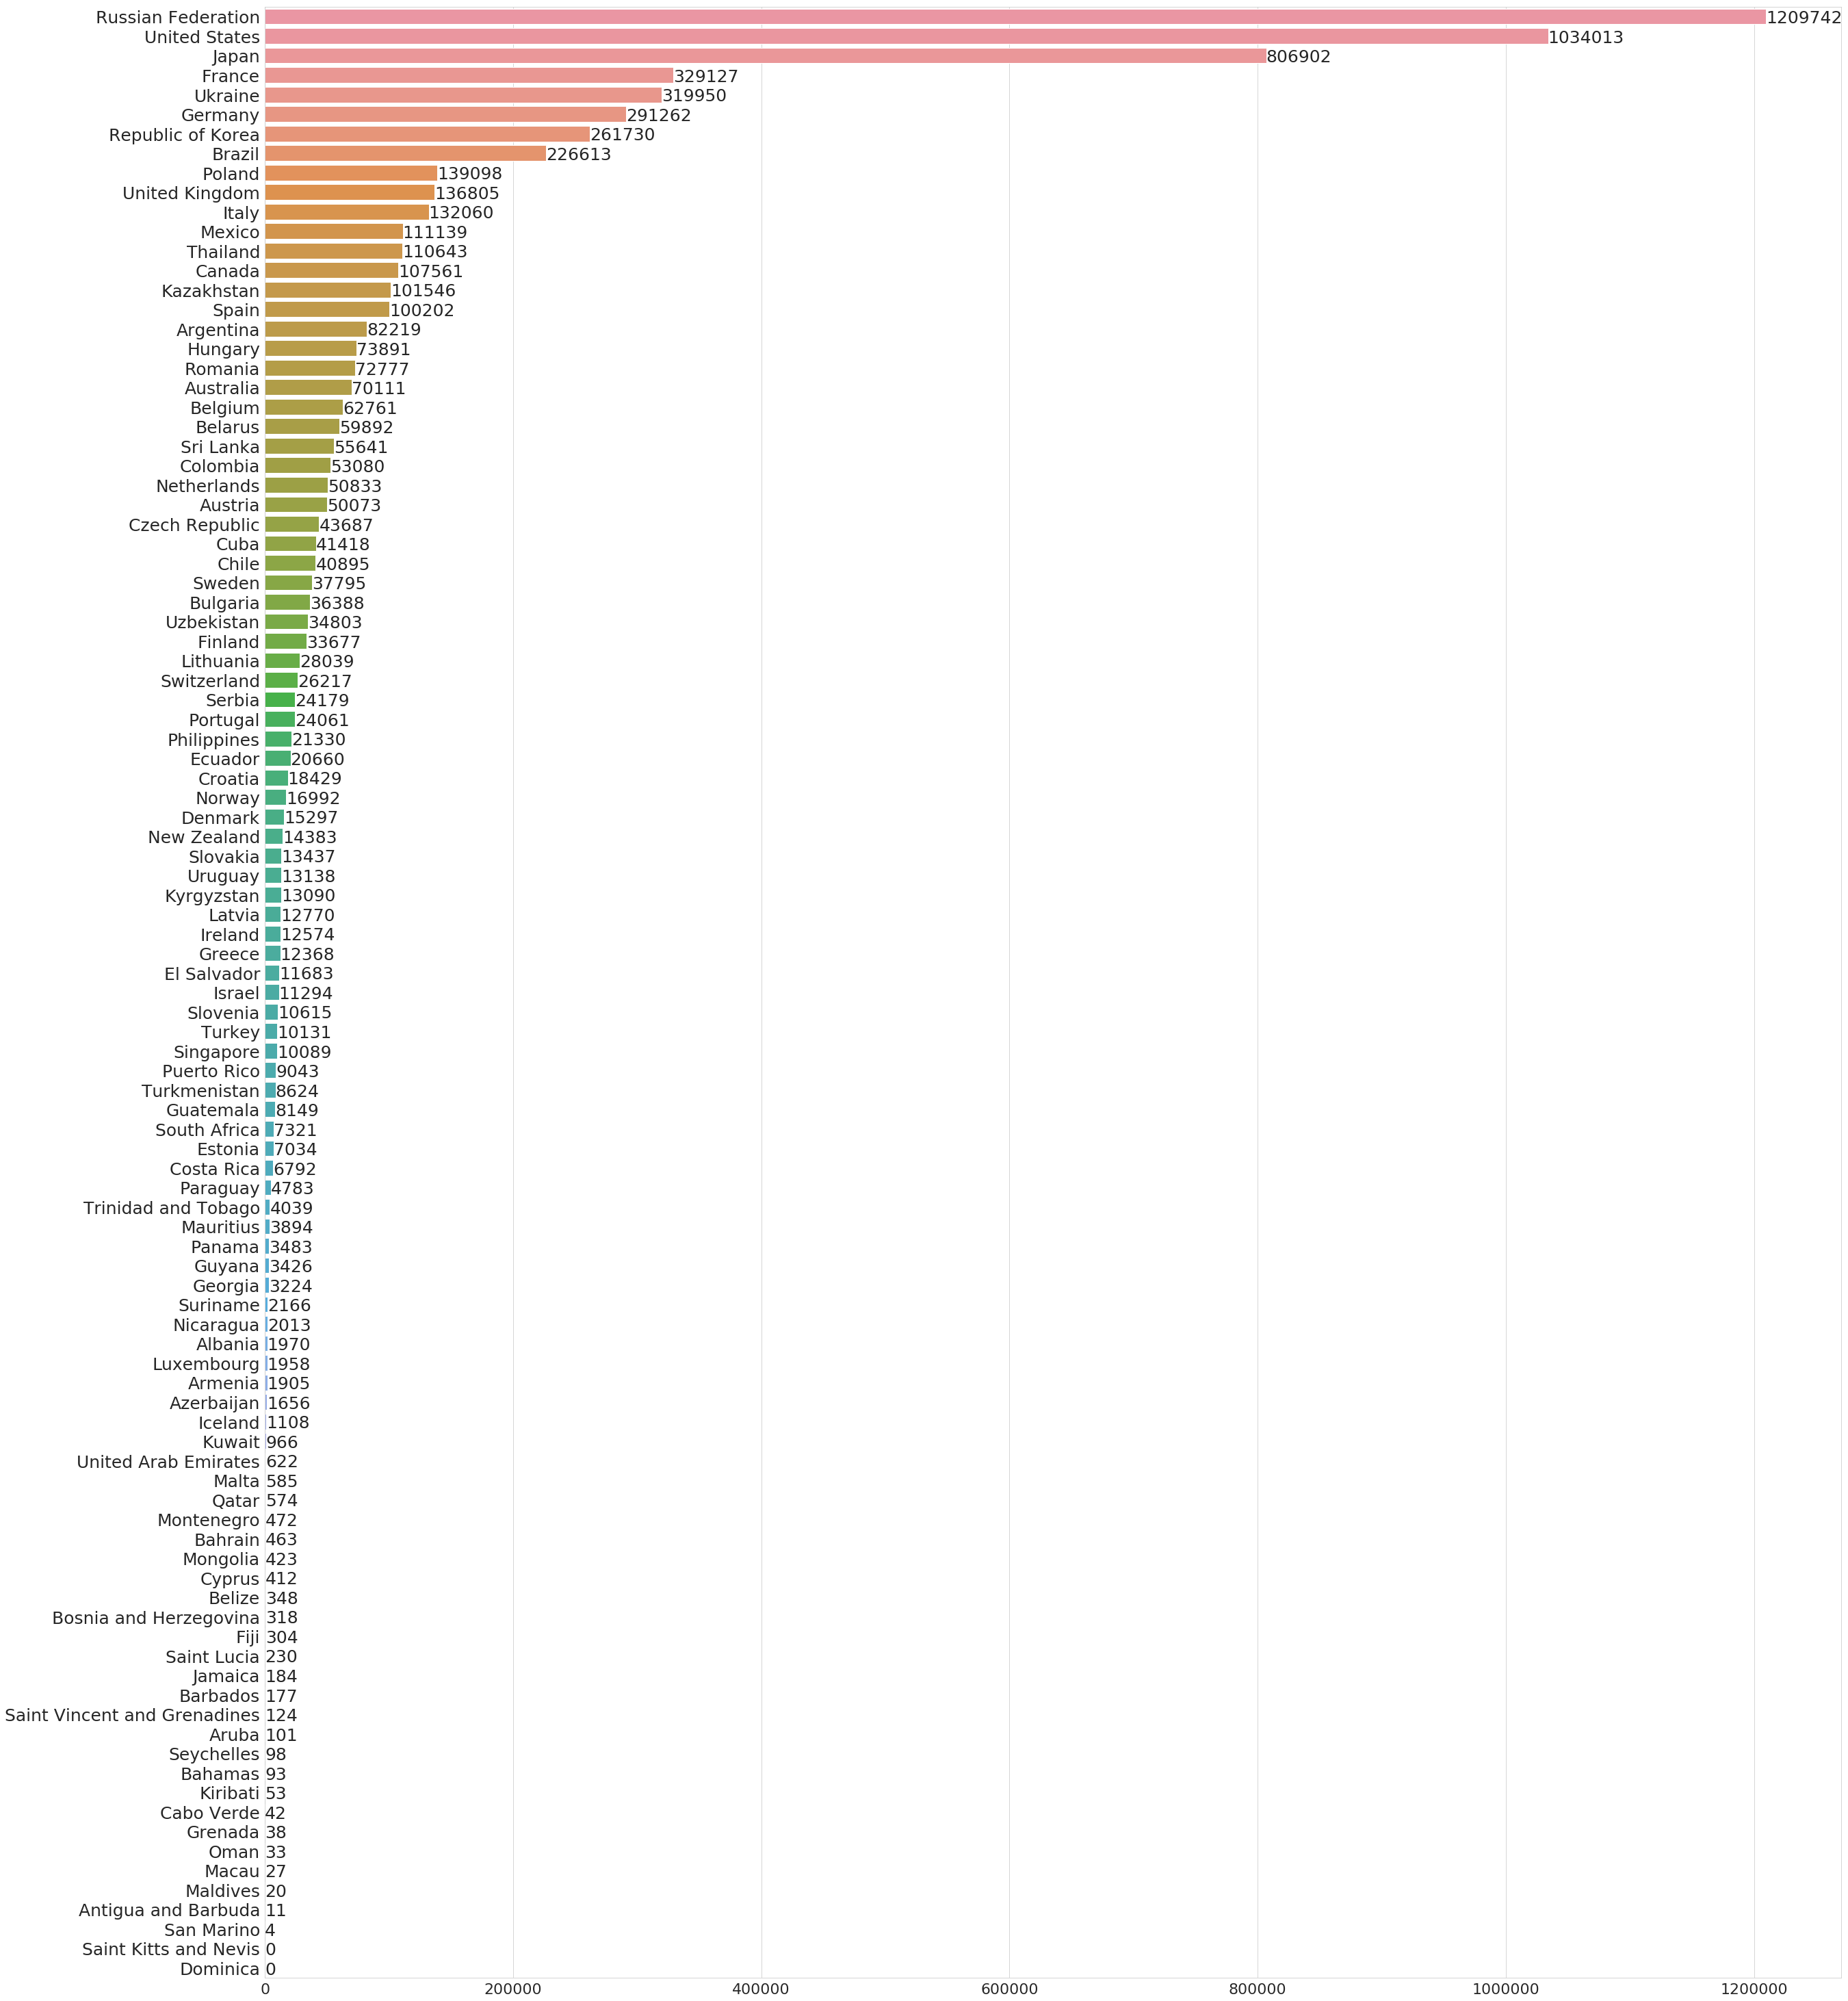

In [17]:
total_suicides = file.groupby("country")["suicides_no"].sum()
total_suicides_df = pd.DataFrame(total_suicides).sort_values(by = "suicides_no", ascending = False)
ind_list = list(total_suicides_df.index)
plt.figure(figsize=(10,40))
plt.subplots_adjust(left=-7, bottom=0.05, right=-3.8, top=1.05, wspace=-0.5, hspace=0.05)
ax=sns.barplot(y=ind_list, x=total_suicides_df.iloc[:,0].values, data=total_suicides_df, ci=None)
plt.xticks(fontsize=22)
plt.yticks(fontsize=25)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+.6*p.get_height(),'{:.0f}'.format(width), ha='left', va='center', fontsize=25)

Considering the top 3 countries, let's see the yearly trend of the numbers of suicides in these countries.

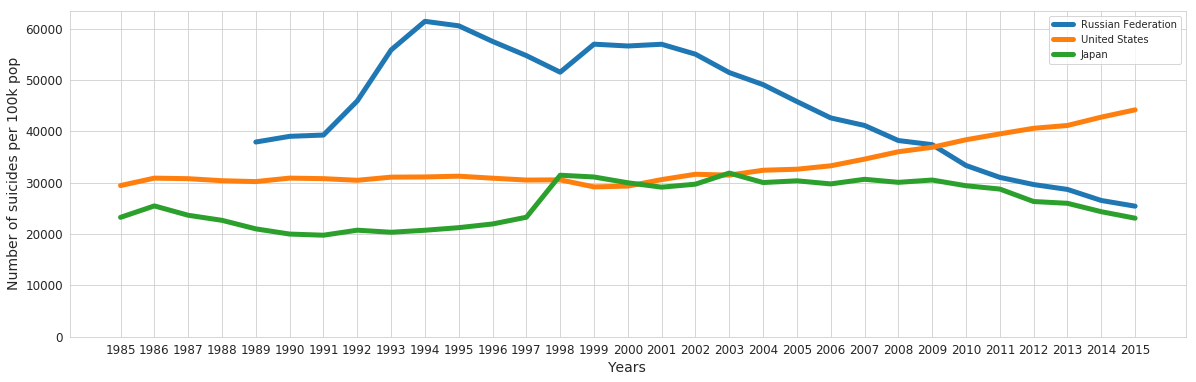

In [18]:
plt.figure(figsize=(20,6))
for c in ("Russian Federation", "United States", "Japan"):
    file_c=file[file['country']==c]
    file_c_grouped=file_c.groupby("year")[["suicides_no"]].sum()
    x=file_c_grouped.index.tolist()
    y=file_c_grouped["suicides_no"]
    plt.plot(x,y, linewidth=5, label=c)
    plt.yticks(np.arange(0,65000, step=10000), fontsize=12)
    plt.xticks(np.arange(1985,2016, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("Number of suicides per 100k pop", fontsize=14)
plt.legend()
plt.show()

In contrast to the recent decreasing trend in the number of suicides in Russian Federation and Japan, the number of suicides in the US is increasing. So, to ignore the fact of having more population, and to have better understanding on the number of suicides, we'd better consider suicides per 100k population in each country.

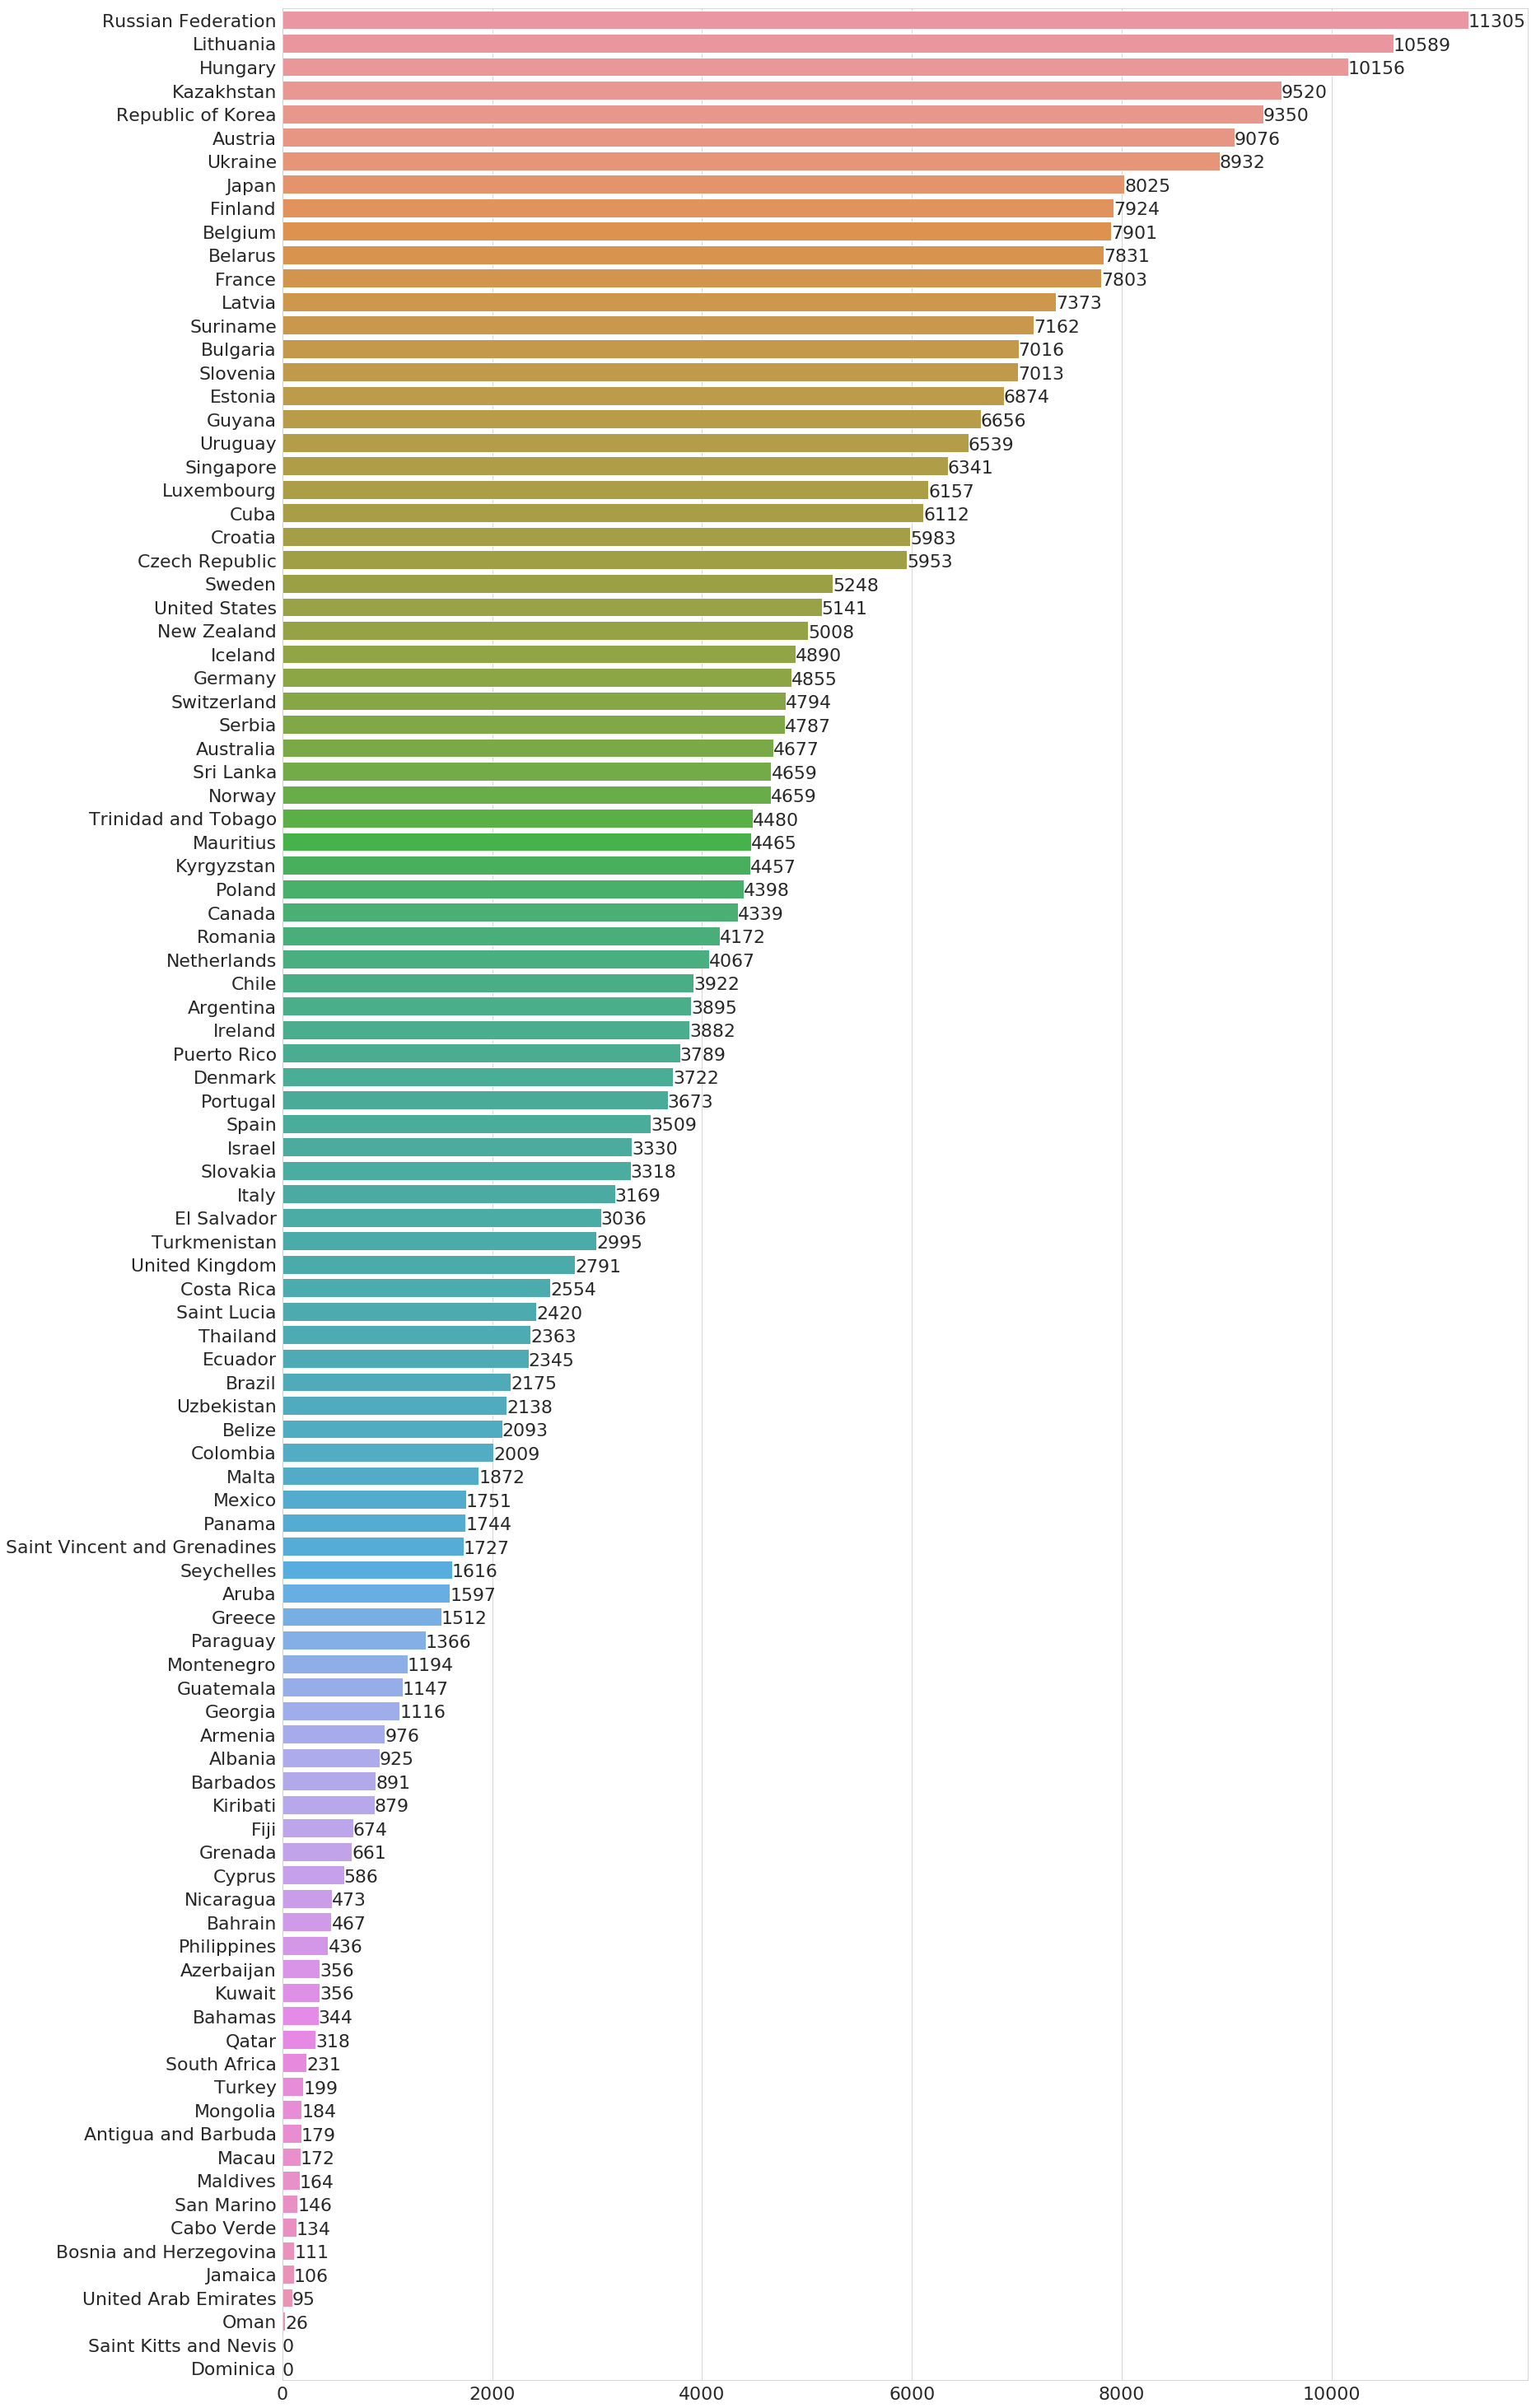

In [19]:
total_suicides_pop=file.groupby("country")["suicides/100k pop"].sum()
total_suicides_pop_df=pd.DataFrame(total_suicides_pop).sort_values(by="suicides/100k pop", ascending=False)
ind_list_pop = list(total_suicides_pop_df.index)
plt.figure(figsize=(10,40))
plt.subplots_adjust(left=-1.05, bottom=0.05, right=1.05, top=1.05, wspace=0.05, hspace=0.05)
ax=sns.barplot(y=ind_list_pop, x=total_suicides_pop_df.iloc[:,0].values, data=total_suicides_pop_df, ci=None)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+.6*p.get_height(),'{:.0f}'.format(width), ha='left', va='center', fontsize=22)

Still Russia is the "winner". It's nice to see that all the leading countries have decreasing trend in the number of suicides per 100k population. The result of the US is presented here as a comparisan: it's mostly flat but slightly increasing. However, it is still below the numbers in many countries.

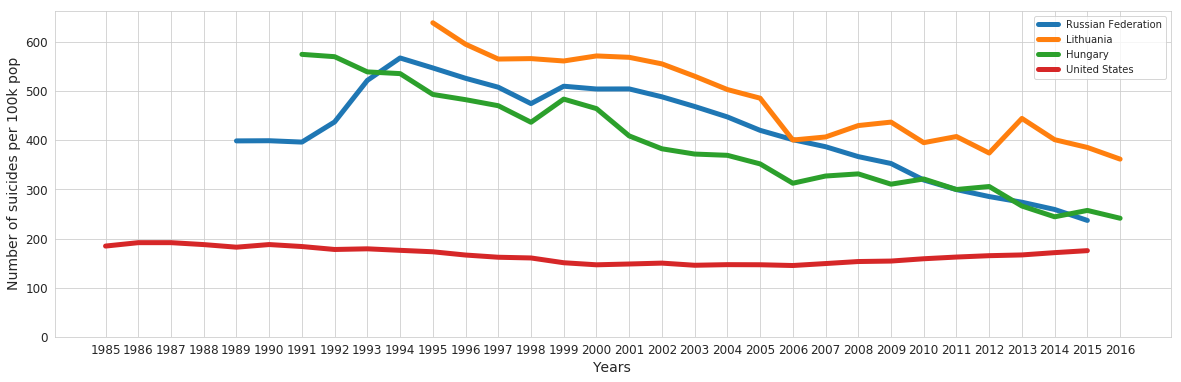

In [20]:
plt.figure(figsize=(20,6))
for c in ["Russian Federation", "Lithuania", "Hungary", "United States"]:
    file_c=file[file['country']==c]
    file_c_grouped=file_c.groupby("year")[['suicides/100k pop']].sum()
    x=file_c_grouped.index.tolist()
    y=file_c_grouped['suicides/100k pop']
    plt.plot(x,y, linewidth=5, label=c)
    plt.yticks(np.arange(0,700, step=100), fontsize=12)
    plt.xticks(np.arange(1985,2017, step=1), fontsize=12)
    plt.xlabel("Years",fontsize=14)
    plt.ylabel("Number of suicides per 100k pop", fontsize=14)
plt.legend()
plt.show()

Thanks a lot for stopping and reading it out. :)
 
If you have some comments to improve the kernel, you are always welcome.
 
If you liked it, and found it useful, **UPVOTEs** are highly appreciated;)
